In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
# osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [4]:
s_e_coordinates = {
    's_coordinates_x': 4.4563069, 
    's_coordinates_y': 51.9296456, 
    'e_coordinates_x': 4.4774856, 
    'e_coordinates_y': 51.9174793
}

# Subway

In [5]:
# osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.metro.pbf"
osm_path = "C:\\projects\\UTNCE\\data\\rotterdam.bus.largest.pbf"

In [6]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 1579/1579 [00:00<00:00, 4650.97it/s]


In [7]:
replacement_dict = {
     
}

sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,2785672,subway,Vlaardingen West,Metro A: Binnenhof => Vlaardingen West,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
1,2785673,subway,Binnenhof,Metro A: Vlaardingen West => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.31574 51.90364, 4.31591 51..."
2,11174054,subway,Schiedam Centrum,Metro A: Binnenhof => Schiedam Centrum,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
3,11174055,subway,Binnenhof,Metro A: Schiedam Centrum => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
4,11174056,subway,Binnenhof,Metro A: Kralingse Zoom => Binnenhof,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53315 51.92146, 4.53316 51..."
5,11174057,subway,Kralingse Zoom,Metro A: Binnenhof => Kralingse Zoom,A,Rail Rotterdam,None,"MULTILINESTRING ((4.53506 51.96028, 4.53508 51..."
6,2785674,subway,Hoek van Holland Strand,Metro B: Nesselande => Hoek van Holland Strand,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
7,2785675,subway,Nesselande,Metro B: Hoek van Holland Strand => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.10702 51.98639, 4.10550 51..."
8,11171043,subway,Steendijkpolder,Metro B: Nesselande => Steendijkpolder,B,Rail Rotterdam,None,"MULTILINESTRING ((4.58655 51.98043, 4.58658 51..."
9,11171044,subway,Nesselande,Metro B: Steendijkpolder => Nesselande,B,Rail Rotterdam,None,"MULTILINESTRING ((4.22415 51.93300, 4.22418 51..."


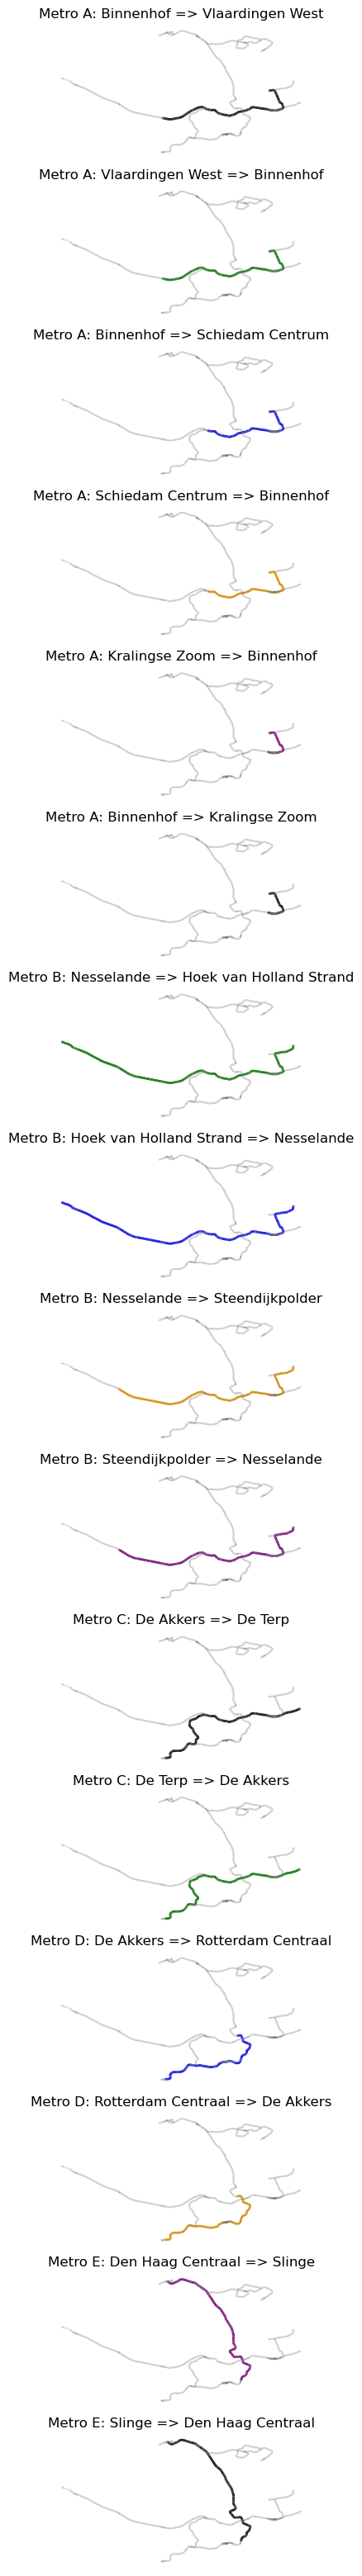

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Rotterdam')

In [10]:
selected_routes = ['Metro A: Binnenhof => Vlaardingen West','Metro A: Vlaardingen West => Binnenhof','Metro B: Nesselande => Hoek van Holland Strand','Metro B: Hoek van Holland Strand => Nesselande','Metro C: De Akkers => De Terp','Metro C: De Terp => De Akkers','Metro D: De Akkers => Rotterdam Centraal','Metro D: Rotterdam Centraal => De Akkers','Metro E: Den Haag Centraal => Slinge','Metro E: Slinge => Den Haag Centraal']

In [11]:
sub_order_route_dict = {key: sub_order_route_dict[key] for key in selected_routes}

In [12]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [13]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [14]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [15]:
sub_shortest_path_edges = {key: sub_shortest_path_edges[key] for key in selected_routes}
sub_shortest_path_edges

{'Metro A: Binnenhof => Vlaardingen West':         osm_id                                           geometry     railway  \
 0    459077281  LINESTRING (4.3435659 51.9031818, 4.3433886 51...  light_rail   
 1    459077281  LINESTRING (4.3390156 51.9022441, 4.3381403 51...  light_rail   
 2    662480800  LINESTRING (4.3187193 51.9031456, 4.3173213 51...  light_rail   
 3    663473523  LINESTRING (4.3208563 51.9027244, 4.3187193 51...  light_rail   
 4    663473525  LINESTRING (4.3150875 51.9038216, 4.3157774 51...  light_rail   
 ..         ...                                                ...         ...   
 104  687533232  LINESTRING (4.5474841 51.9608884, 4.547574 51....  light_rail   
 105  687533233  LINESTRING (4.5472086 51.9610784, 4.5473829 51...  light_rail   
 106  207627814  LINESTRING (4.5356879 51.9602878, 4.5362277 51...  light_rail   
 107  493956404  LINESTRING (4.5390861 51.9608809, 4.5393034 51...  light_rail   
 108  687533230  LINESTRING (4.5372953 51.9605876, 4.539

In [16]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [17]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [18]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, edges)

In [19]:
sub_path_s_e, sub_length_s_e, sub_short_path_edges, sub_start_end_points_coordinates_pairs, sub_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, sub_new_edges, sub_new_nodes)

In [20]:
sub_short_path_edges

,osm_id,geometry,railway,service,id_x,from_id,to_id,distance,time,weights,to_from,from_to,id_y,count_weight,route_name_list,ref,route
492,207188709,"LINESTRING (4.4580891 51.9305871, 4.4581568 51...",subway,None,492,1298,480,652.642705,0.032632,652,"(1298, 480)","(480, 1298)",492.0,1.0,Metro E: Den Haag Centraal => Slinge,E,subway
510,207198646,"LINESTRING (4.4698149 51.923895, 4.4699489 51....",subway,None,510,492,493,31.941243,0.001597,31,"(492, 493)","(493, 492)",510.0,1.0,"Metro D: De Akkers => Rotterdam Centraal, Metr...","D, D",subway
513,207198649,"LINESTRING (4.471423 51.9239234, 4.4725149 51....",subway,None,513,496,495,82.592731,0.004130,82,"(496, 495)","(495, 496)",513.0,1.0,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway
514,207198649,"LINESTRING (4.4725849 51.9241111, 4.4729336 51...",subway,None,514,495,497,36.397713,0.001820,36,"(495, 497)","(497, 495)",514.0,1.0,"Metro D: Rotterdam Centraal => De Akkers, Metr...","D, E",subway
516,207198651,"LINESTRING (4.4661848 51.9237081, 4.4668323 51...",subway,None,516,498,499,45.082035,0.002254,45,"(498, 499)","(499, 498)",NaN,NaN,NaN,NaN,NaN
518,207198653,"LINESTRING (4.4673665 51.9238078, 4.4683942 51...",subway,None,518,491,492,169.296978,0.008465,169,"(491, 492)","(492, 491)",NaN,NaN,NaN,NaN,NaN
519,207198654,"LINESTRING (4.471423 51.9239234, 4.4711646 51....",subway,None,519,496,493,79.286177,0.003964,79,"(496, 493)","(493, 496)",519.0,1.0,Metro D: Rotterdam Centraal => De Akkers,D,subway
538,207219679,"LINESTRING (4.4756766 51.9168166, 4.4783052 51...",subway,None,538,55,1327,344.708241,0.017235,344,"(55, 1327)","(1327, 55)",538.0,1.0,"Metro A: Vlaardingen West => Binnenhof, Metro ...","A, B, C",subway
539,207219679,"LINESTRING (4.4803884 51.9178668, 4.4806528 51...",subway,None,539,1327,546,401.319819,0.020066,401,"(1327, 546)","(546, 1327)",539.0,1.0,"Metro A: Vlaardingen West => Binnenhof, Metro ...","A, B, C",subway
540,207219679,"LINESTRING (4.4859606 51.9189334, 4.4862218 51...",subway,None,540,546,505,68.810164,0.003441,68,"(546, 505)","(505, 546)",540.0,1.0,"Metro A: Vlaardingen West => Binnenhof, Metro ...","A, B, C",subway


In [21]:
sub_distance_s_s_tuple, sub_distance_e_e_tuple = walking_linear_distance(sub_start_end_points_coordinates_pairs,sub_start_end_nearest_id_pairs, sub_new_nodes)

In [22]:
sub_distance_s_s_tuple

223.0654211802136

In [23]:
sub_distance_e_e_tuple

213.1331325540241

In [24]:
choosesub_using_time_tuple = transfer_using_time(sub_short_path_edges, sub_distance_s_s_tuple, sub_distance_e_e_tuple)

In [25]:
choosesub_using_time_tuple

(0.2967785981236677, 18, 0.20953888737682017, 0.08723971074684754)

In [26]:
choosesub_using_time_tuple[1]

18

# Tram

In [27]:
tram_stations, tram_edges, tram_nodes, tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2741/2741 [00:00<00:00, 4548.71it/s]


In [28]:
tram_routes = tram_routes.loc[tram_routes.network == 'Rail Rotterdam']

In [29]:
tram_routes, check_name = check_tram_routes(tram_stations, tram_routes)

In [30]:
replacement_dict = {
    'Scheveningen, ': '',
    'Delft, ': '',
    'Den Haag, ': '',
    'Rotterdam, ': '',
    'Schiedam, ': '',
    'Nootdorp,': '',
    'Wateringen,': '',
    'Leidschendam,': '',
    'Vlaardingen, ': '',
    'Zoetermeer, ': '',
    'Barendrecht, ': '',
    'Beverwaard': 'P+R Beverwaard',
    'Molenlaan': 'Burg. Van Kempensingel',
    'Spangen': 'Spartastraat',
    'Lombardijen': 'Kreekhuizenlaan',
    'Woudestein': 'Burgemeester Oudlaan'  
    
}

tram_stations, tram_routes, check_name = recheck_tram_routes(replacement_dict, tram_stations, tram_routes)

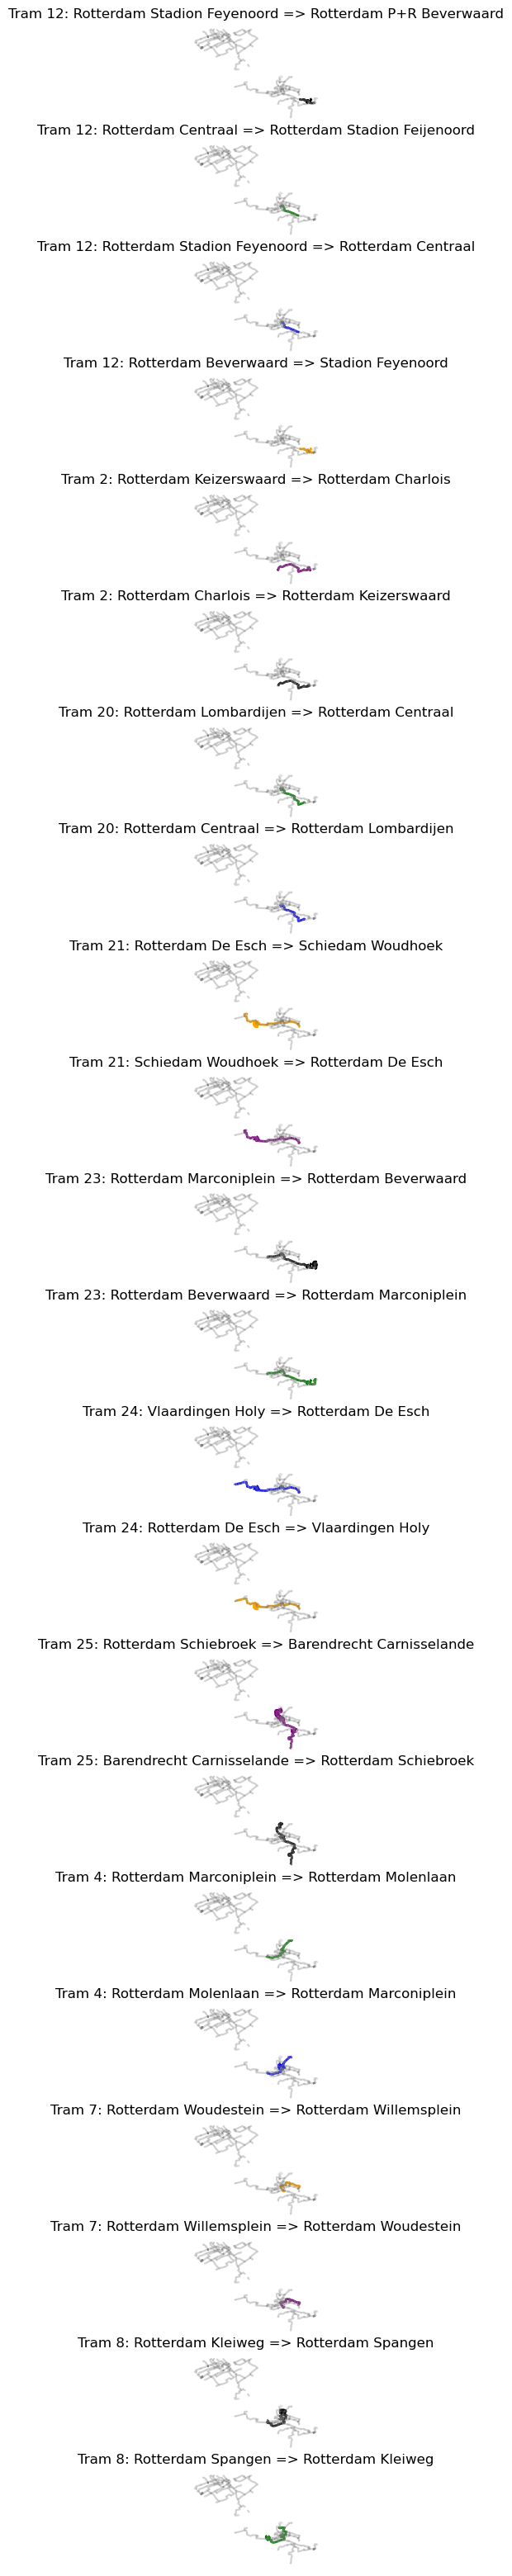

In [31]:
tram_order_route_dict, tram_shortest_path_pairs, tram_shortest_path_edges, tram_edges_dict = tram(tram_stations, tram_edges, tram_nodes, tram_routes, city='Rotterdam')

In [32]:
tram_shortest_path_edges

{'Tram 12: Rotterdam Stadion Feyenoord => Rotterdam P+R Beverwaard':        osm_id                                           geometry railway  \
 0   397655120  LINESTRING (4.5585074 51.8845883, 4.5589008 51...    tram   
 1   397655141  LINESTRING (4.5632251 51.8848885, 4.56483 51.8...    tram   
 2   652495204  LINESTRING (4.56483 51.8852067, 4.5668303 51.8...    tram   
 3    48132277  LINESTRING (4.5520636 51.8905274, 4.5522842 51...    tram   
 4   338952343  LINESTRING (4.5525976 51.8899234, 4.5526578 51...    tram   
 5   338952346  LINESTRING (4.5537609 51.8856475, 4.553746 51....    tram   
 6   338952347  LINESTRING (4.5539367 51.8853236, 4.5540421 51...    tram   
 7   338952355  LINESTRING (4.5528682 51.8892565, 4.5529096 51...    tram   
 8   338952355  LINESTRING (4.5536886 51.887278, 4.5538099 51....    tram   
 9   397655120  LINESTRING (4.5550112 51.885115, 4.5556561 51....    tram   
 10   48132277  LINESTRING (4.5520636 51.8905274, 4.5522842 51...    tram   
 11  338

In [33]:
tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(tram_order_route_dict, tram_routes)

In [34]:
aggregation_functions_nodes = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [35]:
tram_new_nodes = add_columns_to_nodes(tram_order_route_dict, aggregation_functions_nodes, tram_nodes)

In [36]:
tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(tram_shortest_path_edges, tram_routes)

In [37]:
tram_shortest_path_edges

{'Tram 12: Rotterdam Stadion Feyenoord => Rotterdam P+R Beverwaard':        osm_id                                           geometry railway  \
 0   397655120  LINESTRING (4.5585074 51.8845883, 4.5589008 51...    tram   
 1   397655141  LINESTRING (4.5632251 51.8848885, 4.56483 51.8...    tram   
 2   652495204  LINESTRING (4.56483 51.8852067, 4.5668303 51.8...    tram   
 3    48132277  LINESTRING (4.5520636 51.8905274, 4.5522842 51...    tram   
 4   338952343  LINESTRING (4.5525976 51.8899234, 4.5526578 51...    tram   
 5   338952346  LINESTRING (4.5537609 51.8856475, 4.553746 51....    tram   
 6   338952347  LINESTRING (4.5539367 51.8853236, 4.5540421 51...    tram   
 7   338952355  LINESTRING (4.5528682 51.8892565, 4.5529096 51...    tram   
 8   338952355  LINESTRING (4.5536886 51.887278, 4.5538099 51....    tram   
 9   397655120  LINESTRING (4.5550112 51.885115, 4.5556561 51....    tram   
 10   48132277  LINESTRING (4.5520636 51.8905274, 4.5522842 51...    tram   
 11  338

In [38]:
aggregation_functions_edges = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [39]:
tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7468810,"LINESTRING (4.3525044 52.0194351, 4.3525079 52...",tram,None,0,0,1,158.395296,0.007920,158,"(0, 1)","(1, 0)"
1,7515447,"LINESTRING (4.4594295 51.9143185, 4.4595785 51...",tram,None,1,2,3,49.162139,0.002458,49,"(2, 3)","(3, 2)"
2,7523013,"LINESTRING (4.4864828 51.9251177, 4.4865356 51...",tram,None,2,4,2205,500.159544,0.025008,500,"(4, 2205)","(2205, 4)"
3,7523013,"LINESTRING (4.4865293 51.9295998, 4.4865357 51...",tram,None,3,2205,1943,367.949239,0.018397,367,"(2205, 1943)","(1943, 2205)"
4,7523013,"LINESTRING (4.4877652 51.9327348, 4.4878289 51...",tram,None,4,1943,5,61.030339,0.003052,61,"(1943, 5)","(5, 1943)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2736,1165340349,"LINESTRING (4.3711317 52.0036076, 4.3707433 52...",tram,None,2736,1712,1607,567.619135,0.028381,567,"(1712, 1607)","(1607, 1712)"
2737,1167929646,"LINESTRING (4.3060385 52.0727685, 4.3060624 52...",tram,None,2737,625,713,7.283439,0.000364,7,"(625, 713)","(713, 625)"
2738,1181094547,"LINESTRING (4.27116 52.091367, 4.2711445 52.09...",tram,None,2738,679,2370,14.408711,0.000720,14,"(679, 2370)","(2370, 679)"
2739,1181094547,"LINESTRING (4.2711324 52.0914954, 4.2710775 52...",tram,None,2739,2370,1713,323.756345,0.016188,323,"(2370, 1713)","(1713, 2370)"


In [41]:
tram_new_edges = add_columns_to_edges(tram_shortest_path_edges, aggregation_functions_edges, tram_edges)

In [42]:
tram_new_edges

,osm_id,geometry,railway,service,id_x,from_id,to_id,distance,time,weights,to_from,from_to,id_y,count_weight,route_name_list,ref,route
0,7468810,"LINESTRING (4.3525044 52.0194351, 4.3525079 52...",tram,None,0,0,1,158.395296,0.007920,158,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN,NaN
1,7515447,"LINESTRING (4.4594295 51.9143185, 4.4595785 51...",tram,None,1,2,3,49.162139,0.002458,49,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN,NaN
2,7523013,"LINESTRING (4.4864828 51.9251177, 4.4865356 51...",tram,None,2,4,2205,500.159544,0.025008,500,"(4, 2205)","(2205, 4)",2.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
3,7523013,"LINESTRING (4.4865293 51.9295998, 4.4865357 51...",tram,None,3,2205,1943,367.949239,0.018397,367,"(2205, 1943)","(1943, 2205)",3.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
4,7523013,"LINESTRING (4.4877652 51.9327348, 4.4878289 51...",tram,None,4,1943,5,61.030339,0.003052,61,"(1943, 5)","(5, 1943)",4.0,1.0,Tram 7: Rotterdam Willemsplein => Rotterdam Wo...,"7, 8",tram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,1165340349,"LINESTRING (4.3711317 52.0036076, 4.3707433 52...",tram,None,2736,1712,1607,567.619135,0.028381,567,"(1712, 1607)","(1607, 1712)",NaN,NaN,NaN,NaN,NaN
2737,1167929646,"LINESTRING (4.3060385 52.0727685, 4.3060624 52...",tram,None,2737,625,713,7.283439,0.000364,7,"(625, 713)","(713, 625)",NaN,NaN,NaN,NaN,NaN
2738,1181094547,"LINESTRING (4.27116 52.091367, 4.2711445 52.09...",tram,None,2738,679,2370,14.408711,0.000720,14,"(679, 2370)","(2370, 679)",NaN,NaN,NaN,NaN,NaN
2739,1181094547,"LINESTRING (4.2711324 52.0914954, 4.2710775 52...",tram,None,2739,2370,1713,323.756345,0.016188,323,"(2370, 1713)","(1713, 2370)",NaN,NaN,NaN,NaN,NaN


In [43]:
tram_path_s_e, tram_length_s_e, tram_short_path_edges,tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, tram_new_edges, tram_new_nodes)

In [44]:
tram_distance_s_s_tuple, tram_distance_e_e_tuple = walking_linear_distance(tram_start_end_points_coordinates_pairs,tram_start_end_nearest_id_pairs,tram_new_nodes)

In [45]:
tram_distance_s_s_tuple

368.04778604816175

In [46]:
tram_distance_e_e_tuple

258.1746641577468

In [47]:
chosentram_using_time_tuple = transfer_using_time( tram_short_path_edges,tram_distance_s_s_tuple, tram_distance_e_e_tuple)

In [48]:
chosentram_using_time_tuple

(0.2606768663240623, 16, 0.13543237628288057, 0.1252444900411817)

# Bus

In [49]:
bus_stations, bus_edges, bus_nodes, bus_routes = prepare_bus(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████| 164083/164083 [00:34<00:00, 4704.30it/s]


In [50]:
bus_routes = bus_routes.loc[bus_routes.network == 'Bus Rotterdam']
bus_routes = bus_routes.loc[bus_routes.ref != '668']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 77: Rotterdam Zuidplein => Rotterdam Katendrecht']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 30: Capelle Schollevaar => Rotterdam Station Alexander']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 36: Rotterdam Station Alexander => Rotterdam Kralingse Zoom']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 547: Rotterdam Noordereiland => Rotterdam Noordereiland']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 607: Capelle Centrum => Rotterdam Capelsebrug']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 607: Rotterdam Capelsebrug => Capelle Centrum']
bus_routes = bus_routes.loc[bus_routes.name != 'Bus 98: Krimpen aan den IJssel Van Ostadelaan => Krimpen aan den IJssel => Krimpen aan den IJssel Van Ostadelaan']
bus_routes = bus_routes.loc[bus_routes.service != 'night'].reset_index(drop=True)

In [51]:
bus_routes, check_name = check_bus_routes(bus_stations, bus_routes)

In [52]:
replacement_dict = {
    'Slikkerveer, Sporttunnel': 'Ridderkerk, Sporttunnel', # Sporttunnel
    'Dordrecht, Station': 'Dordrecht, Centraal Station',
    'Lansingerland-Zoetermeer Zuidplein': 'Station Lansingerland-Zoetermeer Zuidplein',
    'Ridderkerk, Donkersloot': 'Ridderkerk, Groenendijk', # Groenendijk
        
    'Rotterdam, Caïrostraat': 'Rotterdam, Marconiplein',
    'Schiedam, Nieuwe Maasstraat': 'Schiedam, Station Schiedam Centrum',
    'Rotterdam, Meeuwenstaart': 'Rotterdam, Sleephellingstraat Zuid', # 'Rotterdam, Station Blaak'   'Station Blaak'
    'Barendrecht, Station NS': 'Barendrecht, Station Barendrecht',
    
    'Rotterdam, Damstraat': 'Damstraat',
    'Rotterdam, Metro Pernis': 'Pernis Rotterdam, Pernis Metro', # Pernis Metro
    # 'Rotterdam, SS Rotterdam': 'SS Rotterdam',
    'Barendrecht, Station': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug': 'Rotterdam, Capelsebrug Hoog',
    'Rotterdam, Zuidplein': 'Rotterdam, Zuidplein Hoog',


    'Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
}


bus_stations, bus_routes, check_name = recheck_bus_routes(replacement_dict, bus_stations, bus_routes)

In [53]:
replacement_dict = {

    'Barendrecht, Station Barendrecht Barendrecht': 'Barendrecht, Station Barendrecht',
    'Rotterdam, Capelsebrug Hoog Metro': 'Rotterdam, Capelsebrug Metro', 
    'Rotterdam, Zuidplein Hoog Hoog': 'Rotterdam, Zuidplein Hoog',
    'Poortugaal, Poortugaal, Poortugaal Metro': 'Poortugaal, Poortugaal Metro'
    
    
}
bus_stations, bus_routes, check_name = recheck_bus_routes(replacement_dict, bus_stations, bus_routes)

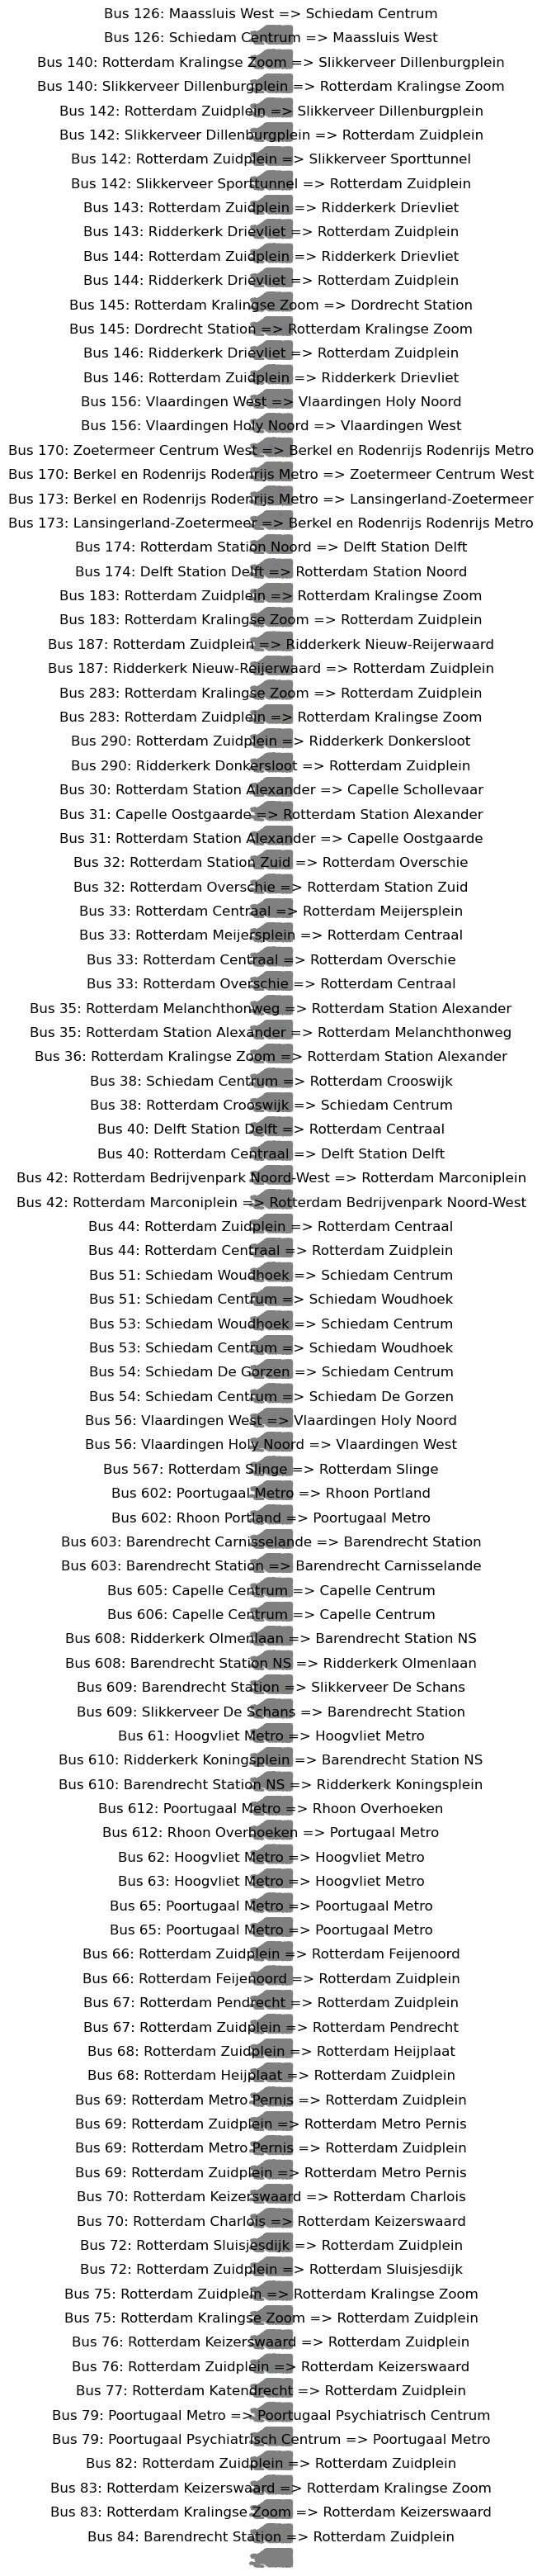

In [54]:
bus_order_route_dict, bus_shortest_path_pairs, bus_shortest_path_edges, bus_edges_dict = bus(bus_stations, bus_edges, bus_nodes, bus_routes, city='Rotterdam')

In [55]:
bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(bus_order_route_dict, bus_routes)

In [56]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [57]:
bus_new_nodes = add_columns_to_nodes(bus_order_route_dict, aggregation_functions, bus_nodes)

In [58]:
bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(bus_shortest_path_edges, bus_routes)

In [59]:
aggregation_functions = {
    'geometry': 'first',
    'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [60]:
bus_new_edges = add_columns_to_edges(bus_shortest_path_edges, aggregation_functions,bus_edges)

In [61]:
bus_path_s_e, bus_length_s_e, bus_short_path_edges, bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs = transfer_shortest_path(s_e_coordinates, bus_new_edges, bus_new_nodes)

In [62]:
bus_distance_s_s_tuple, bus_distance_e_e_tuple = walking_linear_distance(bus_start_end_points_coordinates_pairs, bus_start_end_nearest_id_pairs, bus_new_nodes)

In [63]:
bus_distance_s_s_tuple

0.0

In [64]:
bus_distance_e_e_tuple

28.162606000690204

In [65]:
choosebus_using_time_tuple = transfer_using_time(bus_short_path_edges, bus_distance_s_s_tuple, bus_distance_e_e_tuple)

In [66]:
choosebus_using_time_tuple

(0.13867546738427802, 8, 0.13304294618413998, 0.00563252120013804)

# Compare

In [67]:
dict_fastest = compare_using_time_stb(choosesub_using_time_tuple, sub_new_edges, sub_short_path_edges, chosentram_using_time_tuple, tram_new_edges, tram_short_path_edges,choosebus_using_time_tuple,bus_new_edges,bus_short_path_edges)

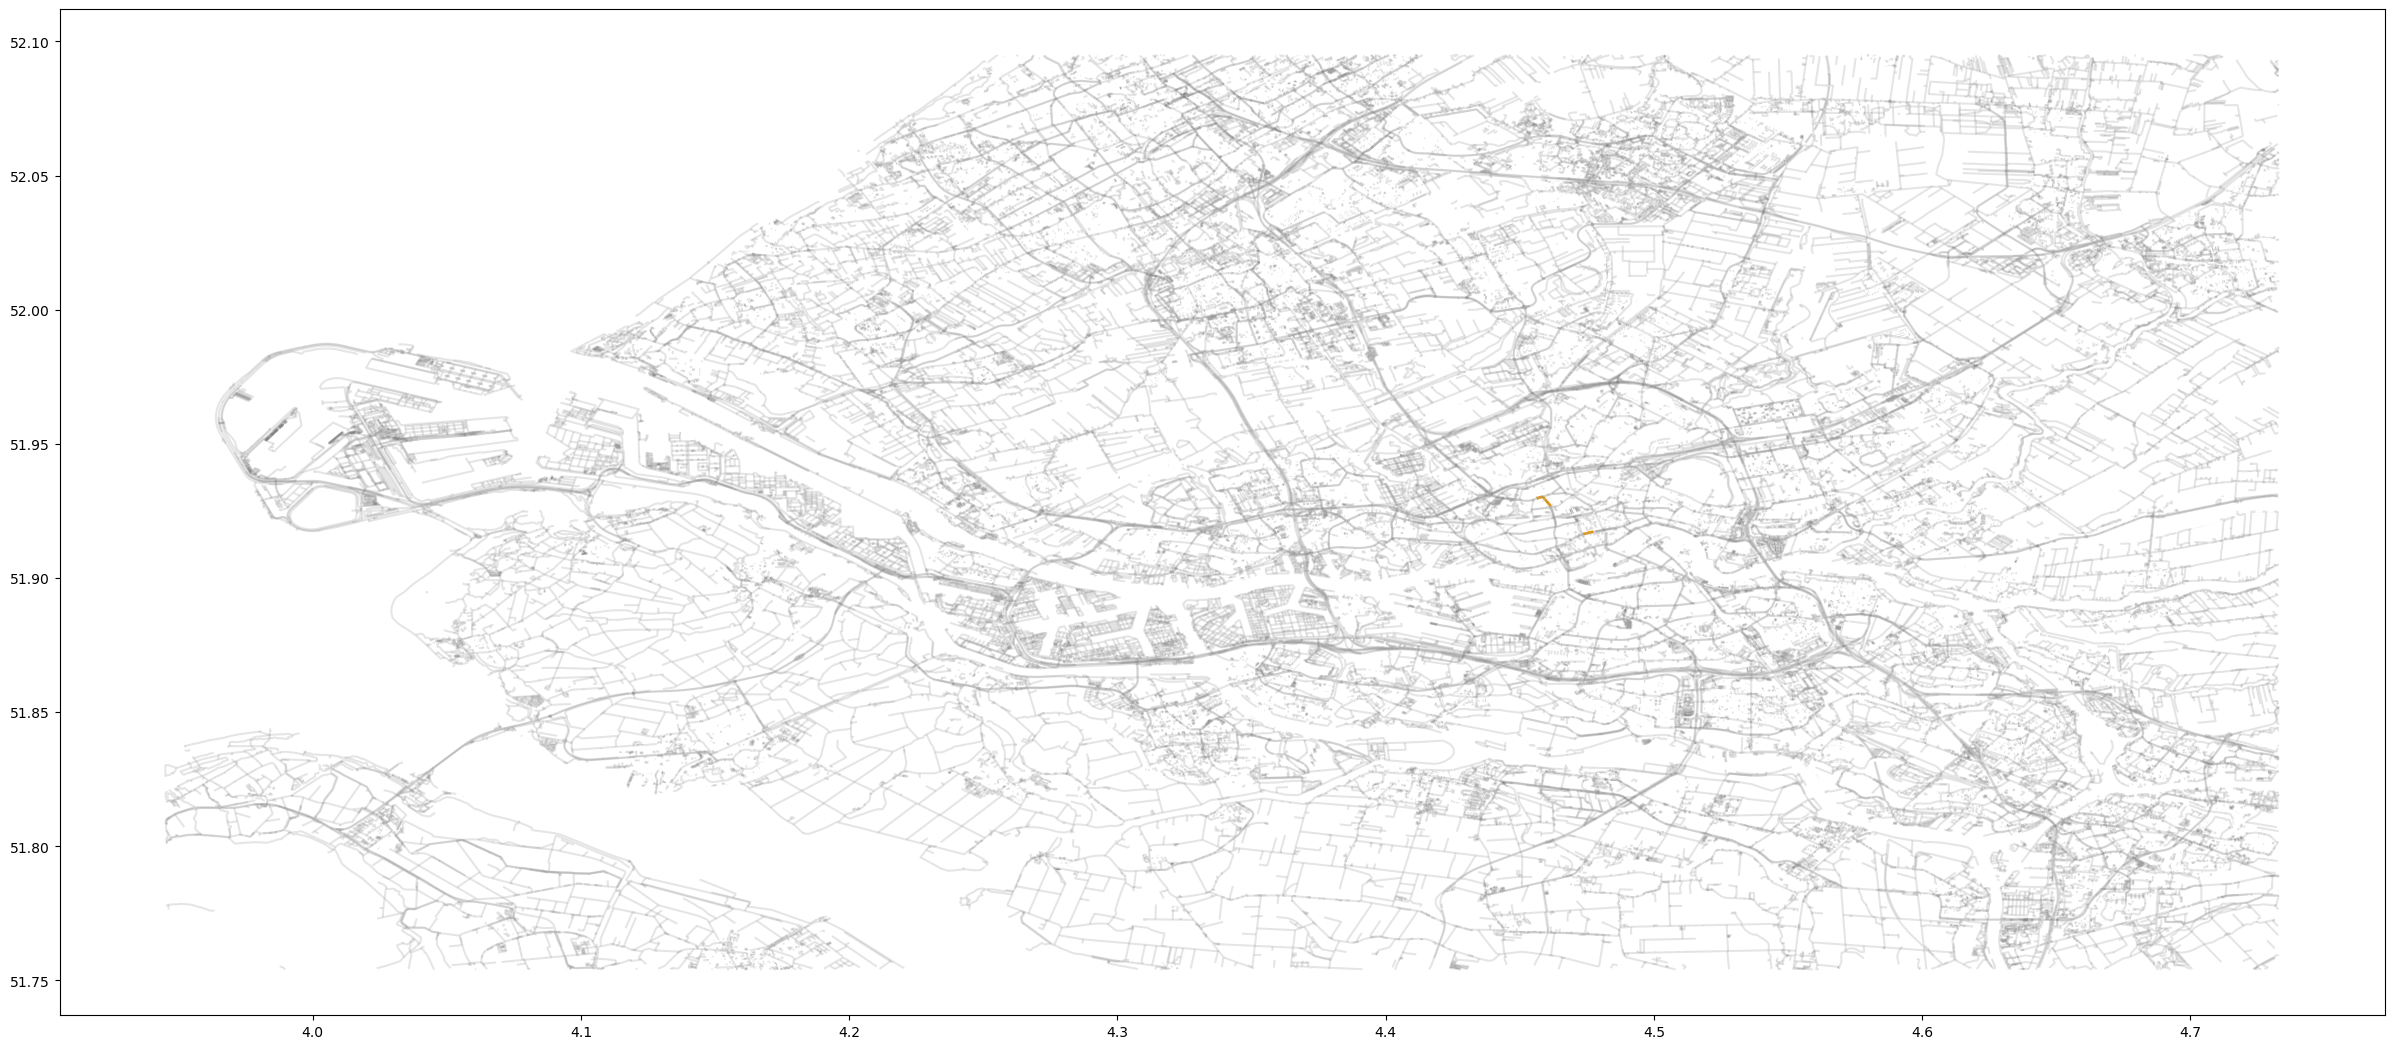

In [68]:
plot_chosen_route(dict_fastest)

In [ ]:
def compare_using_time(choosesub_using_time_tuple, sub_new_edges, sub_short_path_edges,
                       choosetram_using_time_tuple, tram_new_edges, tram_short_path_edges,
                       choosebus_using_time_tuple, bus_new_edges, bus_short_path_edges):
    
    using_time_subway = choosesub_using_time_tuple[1]
    using_time_tram = choosetram_using_time_tuple[1]
    using_time_bus = choosebus_using_time_tuple[1]
    
    min_using_time = min(using_time_subway, using_time_tram, using_time_bus)

    if min_using_time == using_time_subway:
        dict_fastest = {'using_time': using_time_subway,
                 'new_edges': sub_new_edges,
                 'shortest_path_edges': sub_short_path_edges
                }
    elif min_using_time == using_time_tram:
        dict_fastest = {'using_time': using_time_tram,
                 'new_edges': tram_new_edges,
                 'shortest_path_edges': tram_short_path_edges
                }
    else:
        dict_fastest = {'using_time': using_time_bus,
                 'new_edges': bus_new_edges,
                 'shortest_path_edges': bus_short_path_edges
                }

    return dict_fastest

In [ ]:
def plot_chosen_route(dict_fastest):

    fig, ax = plt.subplots(1, 1, figsize=(30, 20))

    gpd.GeoDataFrame(dict_fastest['new_edges'].copy()).plot(ax=ax, color='gray', alpha=0.2)
    gpd.GeoDataFrame(dict_fastest['short_path_edges'].copy()).plot(ax=ax, zorder=1, linewidth=(dict_fastest['short_path_edges'].count_weight) * 2, color='orange')